![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [10]:
import numpy as np
import pandas as pd
import math as math
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("modelo_mc.csv")
print(df.columns)

Index(['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA', 'HOSPITALIZACION'],
      dtype='object')


In [11]:
#Hago un balanceo de los datos realizando un oversampling, ya que faltan valores
from sklearn.utils import resample

#Seleccionar las filas que cumplen la condición
filas_seleccionadas = df.loc[df["HOSPITALIZACION"] == 1.0]

# Realizar oversampling de las filas seleccionadas
oversampled = resample(filas_seleccionadas, replace=True, n_samples=500, random_state=42)

# Concatenar las filas originales con las filas oversampled
df = pd.concat([df, oversampled])

Separen el dataset en X, y (variable objetivo)

In [12]:
X = df[['DIABETES', 'HOSPITALIZACIÓN ULTIMO MES', 'VOLUMEN PROSTATICO',
       'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS', 'CUP',
       'ENF. CRONICA PULMONAR OBSTRUCTIVA', 'BIOPSIA', 'FIEBRE', 'ITU',
       'AGENTE AISLADO', 'PATRON DE RESISTENCIA']]
y = df['HOSPITALIZACION']

Separen el dataset en X_train, X_test, y_train y y_test

In [13]:
from sklearn.model_selection import train_test_split
# Hacemos el split de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4171)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Instanciamos un objeto de la clase DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth = None, random_state = 4171) 

In [15]:
# Entrenamos el modelo

clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=4171)

In [16]:
from sklearn.metrics import accuracy_score

# Predecimos sobre nuestro set de entrenamieto
y_train_pred = clf.predict(X_train)

# Predecimos sobre nuestro set de test
y_test_pred = clf.predict(X_test)

# Comaparamos con las etiquetas reales
print('Porcentaje de aciertos sobre el conjunto de Entrenamiento:', accuracy_score(y_train_pred,y_train))
print('Porcentaje de aciertos sobre el conjunto de Evaluación:', accuracy_score(y_test_pred,y_test))


Porcentaje de aciertos sobre el conjunto de Entrenamiento: 0.9753521126760564
Porcentaje de aciertos sobre el conjunto de Evaluación: 0.9813084112149533


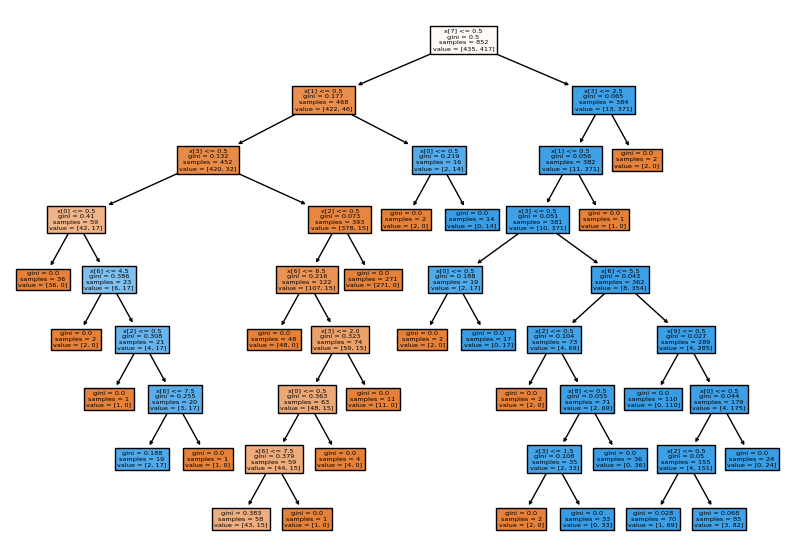

In [17]:
from sklearn import tree

plt.figure(figsize = (10,7))
tree.plot_tree(clf, filled = True)
plt.show()

Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

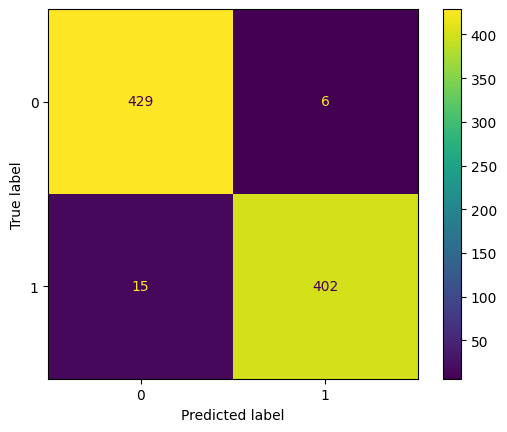

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train, y_train_pred)
cm_display = ConfusionMatrixDisplay(cm)
cm_display.plot()
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [19]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9813084112149533


In [20]:
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_test_pred, average= None)
print(sensibilidad)

[0.98130841 0.98130841]


In [23]:
from sklearn.metrics import f1_score

f1score = f1_score(y_test, y_test_pred, average= None)
print(f1score, type(f1_score))

[0.98130841 0.98130841] <class 'function'>


Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

Encuentre el valor óptimo para k

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

R/